## Explaining the Process to Estimate \( Q \)

Given out 3-dimensional state $ \begin{bmatrix}
x  \\
y  \\
\theta
\end{bmatrix} $, the corresponding Q covariance matrix for the noise has the following structure:

$$ Q_k = \begin{bmatrix}
\text{Var}(x) & \text{Cov}(x,y) & \text{Cov}(x,\theta) \\
\text{Cov}(y,x) & \text{Var}(y) & \text{Cov}(y,\theta) \\
\text{Cov}(\theta,x) & \text{Cov}(\theta,y) & \text{Var}(\theta)
\end{bmatrix} $$


(consulted material: https://www.ucl.ac.uk/~ucfbpve/geotopes/indexch10.html) 

A measurement of the state is not available and we don't have any accurate sensors to do it. The way we chose to calculate Q related to the process relates to the Error Propagation Formula that relates the variance and covariance of a variable that depends upon other to the variances of the latters. \
In general, if $ t = f(X, Y)$

$$
\sigma^2_t = \begin{bmatrix}
\frac{\partial t}{\partial X} & \frac{\partial t}{\partial Y}
\end{bmatrix}
\begin{bmatrix}
\sigma^2_X & \text{cov}(X, Y) \\
\text{cov}(X, Y) & \sigma^2_Y
\end{bmatrix}
\begin{bmatrix}
\frac{\partial t}{\partial X} \\
\frac{\partial t}{\partial Y}
\end{bmatrix}
$$

In our case, the state space model we used toghether with the functions relating the inputs $v$ and $\omega$ to $v_r$ and $v_l$ give us the following discrete time relations:

$$
x_k=x_{\text{k+1}} + Ts \cdot R \cdot (\frac{v_r+v_l}{2})\cdot \cos(\theta_k) = f_1\\
y_k= y_{\text{k+1}} + Ts \cdot R \cdot (\frac{v_r+v_l}{2})\cdot \sin(\theta_k)= f_2\\
\theta_k=\theta_{\text{k+1}}= Ts \cdot R \cdot (\frac{v_r-v_l}{L}) = f_3
$$
where R represents the radius of the wheels and L the distance between them.




We can derive the following formulas:



**VARIANCE ESTIMATION**
$$ \sigma_x^2 = \left( \frac{\partial f_1}{\partial v_r} \right)^2 \sigma_{v_r}^2 + \left( \frac{\partial f_1}{\partial v_l} \right)^2 \sigma_{v_l}^2 + 2 \left( \frac{\partial f_1}{\partial v_r} \right) \left( \frac{\partial f_1}{\partial v_l} \right) \text{Cov}(v_r, v_l) $$

$$ \sigma_y^2 = \left( \frac{\partial f_2}{\partial v_r} \right)^2 \sigma_{v_r}^2 + \left( \frac{\partial f_2}{\partial v_l} \right)^2 \sigma_{v_l}^2 + 2 \left( \frac{\partial f_2}{\partial v_r} \right) \left( \frac{\partial f_2}{\partial v_l} \right) \text{Cov}(v_r, v_l) $$

$$ \sigma_\theta^2 = \left( \frac{\partial f_3}{\partial v_r} \right)^2 \sigma_{v_r}^2 + \left( \frac{\partial f_3}{\partial v_l} \right)^2 \sigma_{v_l}^2 + 2 \left( \frac{\partial f_3}{\partial v_r} \right) \left( \frac{\partial f_3}{\partial v_l} \right) \text{Cov}(v_r, v_l) $$

Since we can consider than the speeds on the two wheels are indipendent one on the other their covarianc is null:

$$\sigma_x^2 =  (\frac{Ts\cdot R}{2} \cos(\theta))^2 \cdot (\sigma_{V_r}^2+ \sigma_{V_l}^2)$$ 
$$\sigma_y^2 = (\frac{Ts\cdot R}{2} \sin(\theta))^2 \cdot (\sigma_{V_r}^2+\sigma_{V_r}^2)$$ 
$$\sigma_\theta^2 =  (\frac{Ts\cdot R}{L})^2 \cdot(\sigma_{V_r}^2+\sigma_{V_r}^2)$$


**COVARIANCE ESTIMATION**
$$
\text{Cov}(x, y) = \left( \frac{\partial f_1}{\partial v_r} \frac{\partial f_2}{\partial v_r} \right) \text{Var}(v_r) + \left( \frac{\partial f_1}{\partial v_l} \frac{\partial f_2}{\partial v_l} \right) \text{Var}(v_l) + \left( \frac{\partial f_1}{\partial v_r} \frac{\partial f_2}{\partial v_l} + \frac{\partial f_1}{\partial v_l} \frac{\partial f_2}{\partial v_r} \right) \text{Cov}(v_r, v_l)
$$

$$
\text{Cov}(x, \theta) = \left( \frac{\partial f_1}{\partial v_r} \frac{\partial f_3}{\partial v_r} \right) \text{Var}(v_r) + \left( \frac{\partial f_1}{\partial v_l} \frac{\partial f_3}{\partial v_l} \right) \text{Var}(v_l) + \left( \frac{\partial f_1}{\partial v_r} \frac{\partial f_3}{\partial v_l} + \frac{\partial f_1}{\partial v_l} \frac{\partial f_3}{\partial v_r} \right) \text{Cov}(v_r, v_l)
$$

$$
\text{Cov}(y, \theta) = \left( \frac{\partial f_2}{\partial v_r} \frac{\partial f_3}{\partial v_r} \right) \text{Var}(v_r) + \left( \frac{\partial f_2}{\partial v_l} \frac{\partial f_3}{\partial v_l} \right) \text{Var}(v_l) + \left( \frac{\partial f_2}{\partial v_r} \frac{\partial f_3}{\partial v_l} + \frac{\partial f_2}{\partial v_l} \frac{\partial f_3}{\partial v_r} \right) \text{Cov}(v_r, v_l)
$$

Hence,

$$
\text{Cov}(x, y) = (\frac{R}{2}\cdot Ts)^2 (\cos(\theta) \sin(\theta))(Var(v_r) + Var(v_l))\\

\text{Cov}(x, \theta) = \frac{(Ts\cdot R)^2}{2L} \cos(\theta)  (Var(v_r) - Var(v_l))\\

\text{Cov}(y, \theta) = \frac{(Ts\cdot R)^2}{2L} \sin(\theta) (Var(v_r) - Var(v_l))
$$
The covariance matrix is always symmetric.



The following code aims to measure with the Thymio the variance over the speed of the two motors:


In [18]:
# Connection to the Thymio
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node d4e6a400-466a-4476-a871-0ff69583670e

In [1]:
import numpy as np

#0) Parameters for the estimation (From Thymio Cheat Sheet)
R = 20 # [mm] diameter of the wheels
L = 105 # [mm] distance between the wheels
#wheel_circumference = 2*R * np.pi # [mm] circumference of the wheels

Ts = 0.2 # [s] Since the motor sensors update every with a frequency of 100 Hz (every 0.01 s),
#I choose a Ts a little bigger than 0.01 s to be sure to have the new values of the sensors

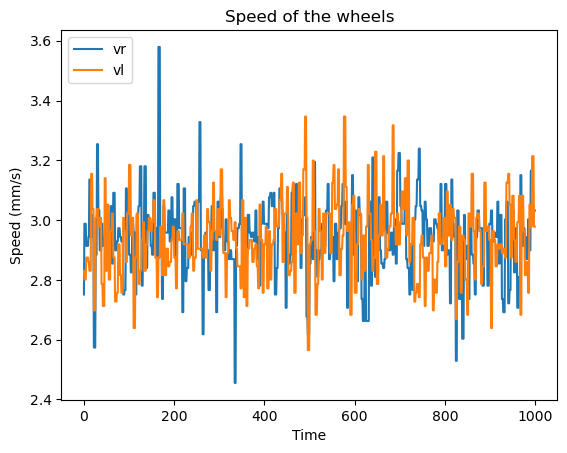

vr_var (mm/s)^2:  0.01805633268469689
vl_var (mm/s)^2:  0.016096378732147785
Original reference for right and left wheel speed: 200 Thymio units
vl_mean in Thymio units:  199.198
vr_mean  in Thymio units:  199.06099999999998


In [26]:
# MEASUREMENTS 
#-----------------------------------------------------------------------------------------------------------
#1) GET SENSOR DATA

# Initialize position and orientation variables
x = 0
y = 0
theta = 0
C_conv_toThymio_right= 67.60908181
C_conv_toThymio_left= 67.82946137



# Lists to store values (for calculating variance)
x_values = []
y_values = []
theta_values = []

vl_values = []
vr_values = []

# Speed of the robot (in Thymio units)
speed = 200 # Thymio units

#Set the speed of the robot
v = {
    "motor.left.target": [speed],
    "motor.right.target": [speed],
}
await node.set_variables(v)

# Read and collect data
await node.wait_for_variables({"motor.left.speed", "motor.right.speed"})
await client.sleep(2) # wait for 5 seconds for avoidin recording data in the transient phase
for i in range(1000): # 1000 samples
    
    vl = node.v.motor.left.speed
    vr = node.v.motor.right.speed
    vl=vl/C_conv_toThymio_left # convert to mm/s
    vr=vr/C_conv_toThymio_right # convert to mm/s
    vl_values.append(vl)
    vr_values.append(vr)
    await client.sleep(Ts)


v = {
    "motor.left.target": [0],
    "motor.right.target": [0],
}
await node.set_variables(v)

#-----------------------------------------------------------------------------------------------------------
#2) CALCULATE VARIANCE of the speed of the wheels
vr_values = np.array(vr_values)
vl_values = np.array(vl_values)
vr_var = np.var(vr_values)
vl_var = np.var(vl_values)
vl_mean = np.mean(vl_values)
vr_mean = np.mean(vr_values)

#plot variances
import matplotlib.pyplot as plt
plt.plot(vr_values)
plt.plot(vl_values)
plt.xlabel('Time')
plt.ylabel('Speed (rad/s)')
plt.title('Speed of the wheels')
plt.legend(['vr', 'vl'], loc='upper left')
plt.show()

print("vr_var (mm/s)^2: ", vr_var)
print("vl_var (mm/s)^2: ", vl_var)
print("Original reference for right and left wheel speed: {} Thymio units".format(speed))
print("vl_mean in Thymio units: ", vl_mean*C_conv_toThymio_left)
print("vr_mean  in Thymio units: ", vr_mean*C_conv_toThymio_right)

Q matrix for theta = 0 rad
[[0.1366108 0.0000000 0.0001493]
 [0.0000000 0.0000000 0.0000000]
 [0.0001493 0.0000000 0.0000496]]


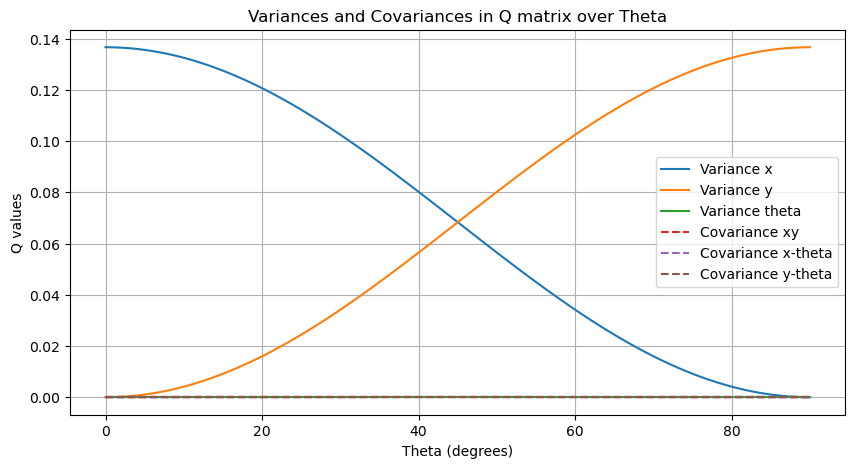

In [3]:
#NUMERICALLY COEFFICIENTS: CALCULATE PARTIAL DERIVATIVES
vr_var = 0.01805633268469689
vl_var = 0.016096378732147785
import numpy as np
import matplotlib.pyplot as plt

def Q_update(R,L,Ts,vr_var, vl_var, theta):
    # Variance formulas
    var_x =  (((Ts* R / 2 )* np.cos(theta) ) ** 2) * (vr_var  + vl_var )
    var_y =  (((Ts* R / 2) * np.sin(theta) ) ** 2) * (vr_var  + vl_var)
    var_theta = ((Ts*R / L) ** 2) * (vr_var  + vl_var )

    # Covariance formulas
    Cov_xy = ((R*Ts / (2*L) )**2) * (np.cos(theta) * np.sin(theta)) * (vr_var + vl_var)
    Cov_xtheta = (((R*Ts)**2) / (2 * L)) * np.cos(theta)  * (vr_var - vl_var)
    Cov_ytheta = (((R*Ts)**2) / (2 * L)) * np.sin(theta)  * (vr_var - vl_var)

    return np.array([[var_x,  Cov_xy, Cov_xtheta], [Cov_xy, var_y, Cov_ytheta], [Cov_xtheta, Cov_ytheta, var_theta]])


#TRIAL WITH THETA = 0
theta=0 #[r]
print("Q matrix for theta = 0 rad")
Q=Q_update(R,L,Ts,vr_var, vl_var, theta)
formatted_Q = np.array2string(Q, formatter={'float_kind': lambda x: f"{x:.7f}"})
print(formatted_Q)


#TRIAL WITH THETA VARIOUS ANGLES:
# Convert degrees to radians for the theta range
theta_degrees = np.linspace(0, 90, num=91)  # from 0 to 90 degrees
theta_radians = np.radians(theta_degrees)

# Initialize arrays to store the variances and covariances
variances = []
covariances = []

# Loop to create Q matrices for each value of theta
Q_matrices = []
for theta in theta_radians:
    Q = Q_update(R, L, Ts, vr_var, vl_var, theta)
    Q_matrices.append(Q)
    variances.append(np.diag(Q))  # Extract variances (diagonal)
    covariances.append(Q[~np.eye(Q.shape[0], dtype=bool)])  # Extract covariances (off-diagonal)

# Convert lists to numpy arrays for easier indexing
variances = np.array(variances)
covariances = np.array(covariances)

# Plotting
plt.figure(figsize=(10, 5))

# Plot variances
state = ['x', 'y', 'theta'];
for i in range(variances.shape[1]):
    plt.plot(theta_degrees, variances[:, i], label=f'Variance {state[i]}')

# Plot covariances
plt.plot(theta_degrees, covariances[:, 1], label=f'Covariance xy', linestyle='--')
plt.plot(theta_degrees, covariances[:, 2], label=f'Covariance x-theta', linestyle='--')
plt.plot(theta_degrees, covariances[:, 3], label=f'Covariance y-theta', linestyle='--')
    

plt.xlabel('Theta (degrees)')
plt.ylabel('Q values')
plt.title('Variances and Covariances in Q matrix over Theta')
plt.legend()
plt.grid(True)
plt.show()





From the graph we can see that:
1. The covariances between theta and the other two variables are always negligible: these value depend in fact on the difference of the variance of the speed of the two wheels. Being it quasi-identical the two values fall down to zero.
2. Covariance between x and y is neglectible. In the mathematica formula we can in fact observe that the same function of $\theta$ is multiplied in this case by the same coefficient that in the variances of x and y but in this case in the denominator there is L which reduces the magnitude of teh coefficient. Moreover, the coefficient, smaller that 1, is also to thw second power and so it is further reduced.
3. Variance of theta is really smaller, quasi-null if compared to the variances of the other state variables. This is due againg to the coefficient which is smaller. 

Finally, we demonstrated that the covariance matrix of the process is diagonal.
Kalman Filter has as an assumption that Q matrix is not depedent on the state. We decided to use tha maximum value for each variance and covariance in order to never overestimate the capabilities of the state predictions:

In [15]:
await node.unlock()

{'error_code': 2}

In [4]:
#3) CALCULATE MAXIMUM VALUES OF VARIANCES AND COVARIANCES

max_variances= np.max(variances, axis=0)
print("Max variances: ", max_variances)
var_x= max_variances[0]
var_y= max_variances[1]
var_theta= max_variances[2]

max_covariances= np.max(covariances, axis=0)
print("Max covariances: ", max_covariances)
Cov_xy= max_covariances[0]
Cov_xtheta= 0
Cov_ytheta= 0

Q= np.array([[var_x,  Cov_xy, Cov_xtheta], [Cov_xy, var_y, Cov_ytheta], [Cov_xtheta, Cov_ytheta, var_theta]])
formatted_Q = np.array2string(Q, formatter={'float_kind': lambda x: f"{x:.5f}"})
print(formatted_Q)

Max variances:  [1.36610846e-01 1.36610846e-01 4.95640256e-05]
Max covariances:  [6.19550320e-06 1.49329825e-04 6.19550320e-06 1.49329825e-04
 1.49329825e-04 1.49329825e-04]
[[0.13661 0.00001 0.00000]
 [0.00001 0.13661 0.00000]
 [0.00000 0.00000 0.00005]]
